In [1]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder

In [4]:
groceries=[]

In [5]:
# As the file is in transaction data, we will be reading data directly 

with open('C:\\Users\\91741\\Downloads\\groceries.csv') as f:
    groceries = f.read()

In [6]:
# splitting the data into separate transactions using separator as "\n"
groceries=groceries.split('\n')
groceries_list=[]

In [8]:
#itteration of elements in groceries list
for i in groceries:
    groceries_list.append(i.split(','))
all_groceries_list=[]    

In [9]:
#For i in groceries_list:
#All_groceries_list = all_groceries_list+i
all_groceries_list = [i for item in groceries_list for i in item]
from collections import Counter
item_frequencies = Counter(all_groceries_list)
item_frequencies = sorted(item_frequencies.items(),key = lambda x:x[1])

In [11]:
# Storing frequencies and items in separate variables 
frequencies=list(reversed([i[1] for i in item_frequencies]))
items=list(reversed([i[0] for i in item_frequencies]))

<ipython-input-12-9a251f2fdd39>:4: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  plt.bar(height = frequencies[:11],x = list(range(0,11)),color='rgbkymc');plt.xticks(list(range(0,11),),items[:11]);plt.xlabel("items")


Text(0, 0.5, 'Count')

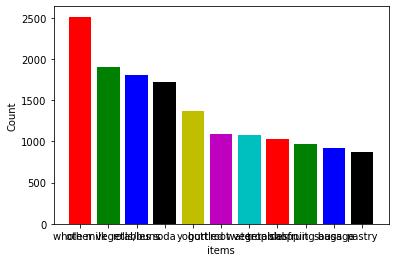

In [12]:
# barplot of top 10 

import matplotlib.pyplot as plt
plt.bar(height = frequencies[:11],x = list(range(0,11)),color='rgbkymc');plt.xticks(list(range(0,11),),items[:11]);plt.xlabel("items")
plt.ylabel("Count")

In [17]:
 #Creating Data Frame for the transactions data 
# Purpose of converting all list into Series object Coz to treat each list element as entire element not to separate 

groceries_series  = pd.DataFrame(pd.Series(groceries_list))
groceries_series = groceries_series.iloc[:9835,:] # removing the last empty transaction
groceries_series.columns = ["transactions"]

In [20]:
# creating a dummy columns for the each item in each transactions ... Using column names as item name

X = groceries_series['transactions'].str.join(sep='*').str.get_dummies(sep='*')
frequent_itemsets = apriori(X,min_support=0.005, max_len=3,use_colnames = True)
frequent_itemsets.shape

(1347, 2)

<ipython-input-22-e3a6bd8e99e1>:5: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  plt.bar(x = list(range(1,11)),height = frequent_itemsets.support[1:11],color='rgmyk');plt.xticks(list(range(1,11)),frequent_itemsets.itemsets[1:11])


Text(0, 0.5, 'support')

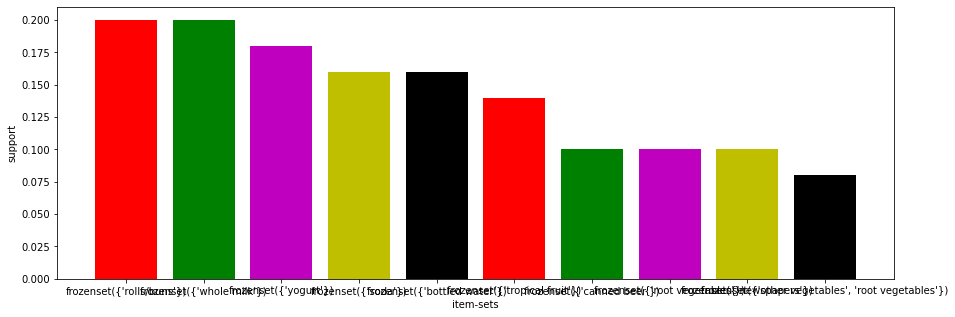

In [22]:
# Most Frequent item sets based on support 

frequent_itemsets.sort_values('support',ascending = False,inplace=True)
plt.figure(figsize=(15, 5))
plt.bar(x = list(range(1,11)),height = frequent_itemsets.support[1:11],color='rgmyk');plt.xticks(list(range(1,11)),frequent_itemsets.itemsets[1:11])
plt.xlabel('item-sets');plt.ylabel('support')

In [23]:
#Declaring rules var for association rule

rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.shape

(6176, 9)

In [24]:
#Fetching rules

rules.head(20)
rules.sort_values('lift',ascending = False,inplace=True)

In [25]:
#To eliminate Redudancy in Rules 

def to_list(i):
    return (sorted(list(i)))

In [26]:

ma_X = rules.antecedents.apply(to_list)+rules.consequents.apply(to_list)
ma_X = ma_X.apply(sorted)
rules_sets = list(ma_X)
unique_rules_sets = [list(m) for m in set(tuple(i) for i in rules_sets)]
index_rules = []
for i in unique_rules_sets:
    index_rules.append(rules_sets.index(i))

In [27]:
# getting rules without any redudancy 

rules_no_redudancy  = rules.iloc[index_rules,:]

In [28]:
# Sorting them with respect to list and getting top 10 rules 

rules_no_redudancy.sort_values('lift',ascending=False).head(10)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
381,"(candy, sweet spreads)",(salty snack),0.02,0.02,0.02,1.0,50.0,0.0196,inf
5834,"(flour, waffles)",(bathroom cleaner),0.02,0.02,0.02,1.0,50.0,0.0196,inf
6097,(artif. sweetener),"(soda, other vegetables)",0.02,0.02,0.02,1.0,50.0,0.0196,inf
2415,"(spices, rolls/buns)",(hamburger meat),0.02,0.02,0.02,1.0,50.0,0.0196,inf
3067,(hard cheese),"(curd, other vegetables)",0.02,0.02,0.02,1.0,50.0,0.0196,inf
3532,"(salty snack, flour)",(frozen dessert),0.02,0.02,0.02,1.0,50.0,0.0196,inf
620,"(soda, coffee)",(domestic eggs),0.02,0.02,0.02,1.0,50.0,0.0196,inf
3695,(domestic eggs),"(pastry, whole milk)",0.02,0.02,0.02,1.0,50.0,0.0196,inf
4168,(frozen dessert),(sweet spreads),0.02,0.02,0.02,1.0,50.0,0.0196,inf
2390,"(long life bakery product, whipped/sour cream)",(hard cheese),0.02,0.02,0.02,1.0,50.0,0.0196,inf


In [55]:
!pip install apyori

  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5979 sha256=052d4c2035fac9fca3416bae01c419ea182b625fafcd851ab59f23f1cb9a7687
  Stored in directory: c:\users\91741\appdata\local\pip\cache\wheels\1b\02\6c\a45230be8603bd95c0a51cd2b289aefdd860c1a100eab73661
Successfully built apyori


In [56]:
from apyori import apriori

In [57]:
book=pd.read_csv('C:\\Users\\91741\\Downloads\\book.csv')

In [58]:
book.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


In [59]:
book.shape

(2000, 11)

In [61]:
records=[]
for i in range(0,2000):
    records.append([str(book.values[i,j])for j in range(0,10)])

In [62]:
association_rules=apriori(records,min_support=0.005)
association_results=list(association_rules)

In [63]:
association_results

[RelationRecord(items=frozenset({'0'}), support=0.9975, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'0'}), confidence=0.9975, lift=1.0)]),
 RelationRecord(items=frozenset({'1'}), support=0.7605, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'1'}), confidence=0.7605, lift=1.0)]),
 RelationRecord(items=frozenset({'0', '1'}), support=0.758, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'0', '1'}), confidence=0.758, lift=1.0), OrderedStatistic(items_base=frozenset({'0'}), items_add=frozenset({'1'}), confidence=0.7598997493734335, lift=0.9992107158099061), OrderedStatistic(items_base=frozenset({'1'}), items_add=frozenset({'0'}), confidence=0.9967126890203813, lift=0.9992107158099061)])]

In [64]:
movies=pd.read_csv('C:\\Users\\91741\\Downloads\\my_movies.csv')

In [65]:
movies.head()

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0


In [66]:
movies.shape

(10, 15)